In [1]:
# Import libarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Import the dataset
root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 2 - Regression/Decision Tree Regression/Position_Salaries.csv'
dataset = pd.read_csv(data_file)
'''
Decision tree regression breaks the data set into `leafs` which furfill a set
of conditions like the diagram below. It splits the data into these leafs
and then takes and average of the values that fit that condition to help
predict any values being added to the tree.
      x < 20
     /     \
x > 70    x < 120
            /  \
              x < 5
    
So this data set shows the levels of employess and the salary you
get at that level.

So now when we hire emplyees we can check them against our salary curve.
E.g - An Regional Manager with two yrs experience on their way to Partner.
      We can say they're 6.5 and check the salary on our graph.
''' 
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


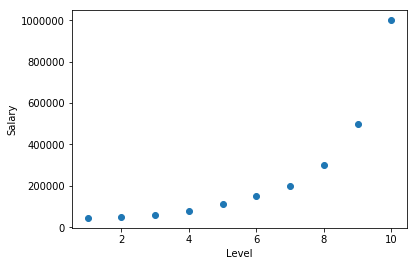

In [3]:
# Splitting features and outcomes
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

plt.scatter(x, y)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [4]:
# Create the decision tree regression
regression = DecisionTreeRegressor(random_state=0) # we only put random state here to get the same value as the guy in the video
regression.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [5]:
# Lets make some predictions...
yrs_exp = [[6.5]]

regression.predict(yrs_exp)

array([150000.])

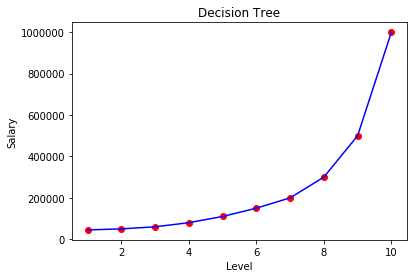

In [6]:
# Visualise the results - Decision Tree Regression - (ohh no!!)
# DTR is not continious so the lines are being interplated to join up
# as DTR is the avergae of leafs I would expect this to be more stepped.
# E.g - Values between 5 and 6 should all be the same.
plt.scatter(x, y, color="red")
plt.plot(x, regression.predict(x), color="blue")
plt.title("Decision Tree")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

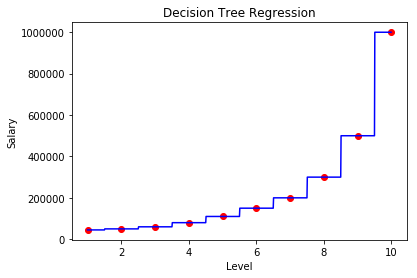

In [7]:
# Visualise the results - this looks a lot better.
# As we're increasing the granularity of x axis.
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color="red")
plt.plot(x_grid, regression.predict(x_grid), color="blue")
plt.title("Decision Tree Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()